# Milestone 1

# Narrative

For this project, I am focusing on the League of Legends Esports community. Within the League of Legends Esports community, there are many different regional leagues to include Korea, China, Vietnam, Europe, and North America. There are a total of two splits each year, a spring split, and a summer split, where teams in their own leagues will compete to be the best team of that split. After each split, there is an international event, MSI for spring and Worlds for Summer, where each league sends up to 3 teams to compete against the other league teams. 

In this project, I am going to focus on one of the business problems for the North American League of Legends Championship Series (LCS) teams and players. For years now, the LCS teams have been, by and large, a disappointment when it comes to the international events. North American team and player brands have taken a hit from disappointing performances during these international events.

Many of the “complaints” that the fans have is that the North American teams and players don’t take the game seriously. Many people feel that the players and teams are not using their training or scrimming time wisely. 

The Korean and Chinese teams have various ways that they scrim other teams. Some of those variations include a mode they call “Blitz.” Blitz is when teams face each other and only play the first 15 minutes of the game. After the first 15 minutes, they end the game, take notes, and go again, repeating this process over several hours. They train through this game mode because those teams believe the first 15 minutes can determine the outcome of a game. 

North American teams are not using this style of scrimming for their practice. In fact, there have been a few Korean players and coaches who have joined North American teams and tried to implement this concept, but there was push back. 

For this project, my model is going to attempt to predict game results accurately. So, in this case, the target of the model is going to be the game result, whether that is a win or a loss. However, even though the target of the model is the result of the game for a team, my analysis is going to focus on whether the first 15 minutes of a game will determine the outcome of the game. I will conduct this analysis by looking at the correlation for different variables of the model. 


# Graphs

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import cv2

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

In [3]:
# importing the dataset
lol_df = pd.read_csv("NA_LOL.csv")

In [4]:
# making sure it imported correctly
lol_df.head()

,Unnamed: 0,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2460,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,1,Blue,top,Ssumday,oe:player:f35d122e169ccf24593a4d06927a3e2,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Renekton,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,3,0,1,11,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,9332.0,344.9908,0.196720,656.0074,495.7116,13.0,0.4806,12.0,0.4436,5.0,46.0,1.7006,11190,7603.0,281.0721,0.212986,9725.0,NaN,231.0,219.0,12.0,0.0,8.0,8.5397,3752.0,4729.0,72.0,3226.0,4487.0,74.0,526.0,242.0,-2.0,2.0,1.0,0.0,1.0,0.0,2.0,5487.0,6990.0,115.0,5153.0,7593.0,129.0,334.0,-603.0,-14.0,2.0,1.0,0.0,1.0,0.0,2.0
1,2461,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,2,Blue,jng,Closer,oe:player:96da046ebab4cac9bcba2c9afd85999,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Taliyah,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,2,0,7,11,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10652.0,393.7893,0.224546,550.6839,242.8835,21.0,0.7763,8.0,0.2957,7.0,48.0,1.7745,10241,6654.0,245.9889,0.186403,9460.0,NaN,172.0,22.0,150.0,84.0,35.0,6.3586,3238.0,3328.0,65.0,3238.0,3603.0,67.0,0.0,-275.0,-2.0,0.0,3.0,0.0,0.0,1.0,1.0,5219.0,5276.0,100.0,5047.0,6352.0,117.0,172.0,-1076.0,-17.0,0.0,3.0,0.0,0.0,1.0,1.0
2,2462,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,3,Blue,mid,Damonte,oe:player:b38e8427233eea81494ca1b3ec13f0a,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Twisted Fate,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,2,1,8,11,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,11308.0,418.0407,0.238374,419.8152,224.1035,11.0,0.4067,11.0,0.4067,6.0,35.0,1.2939,12335,8748.0,323.4011,0.245060,11600.0,NaN,232.0,224.0,8.0,8.0,0.0,8.5767,3944.0,4221.0,78.0,2848.0,3983.0,67.0,1096.0,238.0,11.0,1.0,2.0,1.0,0.0,1.0,1.0,6141.0,7214.0,136.0,4655.0,6738.0,121.0,1486.0,476.0,15.0,1.0,2.0,1.0,0.0,1.0,1.0
3,2463,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,4,Blue,bot,FBI,oe:player:73d2b65353d7b00e0f198ffdc085edc,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Kai'Sa,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,4,0

In [5]:
# looking at the list of columns
lol_df.columns.tolist()

['Unnamed: 0',
 'gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'opp_turretplates',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampion

In [6]:
# splitting the data set into a win dataframe
win_df = lol_df[lol_df['result'] == 1]

In [7]:
# making sure it worked
win_df.head()

,Unnamed: 0,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2460,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,1,Blue,top,Ssumday,oe:player:f35d122e169ccf24593a4d06927a3e2,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Renekton,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,3,0,1,11,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,9332.0,344.9908,0.196720,656.0074,495.7116,13.0,0.4806,12.0,0.4436,5.0,46.0,1.7006,11190,7603.0,281.0721,0.212986,9725.0,NaN,231.0,219.0,12.0,0.0,8.0,8.5397,3752.0,4729.0,72.0,3226.0,4487.0,74.0,526.0,242.0,-2.0,2.0,1.0,0.0,1.0,0.0,2.0,5487.0,6990.0,115.0,5153.0,7593.0,129.0,334.0,-603.0,-14.0,2.0,1.0,0.0,1.0,0.0,2.0
1,2461,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,2,Blue,jng,Closer,oe:player:96da046ebab4cac9bcba2c9afd85999,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Taliyah,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,2,0,7,11,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10652.0,393.7893,0.224546,550.6839,242.8835,21.0,0.7763,8.0,0.2957,7.0,48.0,1.7745,10241,6654.0,245.9889,0.186403,9460.0,NaN,172.0,22.0,150.0,84.0,35.0,6.3586,3238.0,3328.0,65.0,3238.0,3603.0,67.0,0.0,-275.0,-2.0,0.0,3.0,0.0,0.0,1.0,1.0,5219.0,5276.0,100.0,5047.0,6352.0,117.0,172.0,-1076.0,-17.0,0.0,3.0,0.0,0.0,1.0,1.0
2,2462,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,3,Blue,mid,Damonte,oe:player:b38e8427233eea81494ca1b3ec13f0a,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Twisted Fate,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,2,1,8,11,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,11308.0,418.0407,0.238374,419.8152,224.1035,11.0,0.4067,11.0,0.4067,6.0,35.0,1.2939,12335,8748.0,323.4011,0.245060,11600.0,NaN,232.0,224.0,8.0,8.0,0.0,8.5767,3944.0,4221.0,78.0,2848.0,3983.0,67.0,1096.0,238.0,11.0,1.0,2.0,1.0,0.0,1.0,1.0,6141.0,7214.0,136.0,4655.0,6738.0,121.0,1486.0,476.0,15.0,1.0,2.0,1.0,0.0,1.0,1.0
3,2463,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,4,Blue,bot,FBI,oe:player:73d2b65353d7b00e0f198ffdc085edc,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Kai'Sa,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,4,0

In [8]:
# splitting the dataset intoa lose dataframe
lose_df = lol_df[lol_df['result'] == 0]

In [9]:
# making sure it worked
lose_df.head()

,Unnamed: 0,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
5,2465,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,6,Red,top,Huni,oe:player:bcb79ac1654e9a40600fba1eb3e53af,TSM,oe:team:a22510a4756fa424cb0771b13261139,Gnar,Olaf,Pantheon,Aphelios,Camille,Alistar,1623,0,1,4,0,1,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,10159.0,375.5638,0.283036,727.8743,403.5120,12.0,0.4436,2.0,0.0739,4.0,22.0,0.8133,8417,4830.0,178.5582,0.225225,6750.0,NaN,207.0,207.0,0.0,0.0,0.0,7.6525,3226.0,4487.0,74.0,3752.0,4729.0,72.0,-526.0,-242.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,5153.0,7593.0,129.0,5487.0,6990.0,115.0,-334.0,603.0,14.0,1.0,0.0,2.0,2.0,1.0,0.0
6,2466,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,7,Red,jng,Spica,oe:player:fbadcf84fcfb01a251de88055f631cb,TSM,oe:team:a22510a4756fa424cb0771b13261139,Graves,Olaf,Pantheon,Aphelios,Camille,Alistar,1623,0,0,2,1,1,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.037,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5835.0,215.7116,0.162567,667.9482,435.0832,12.0,0.4436,14.0,0.5176,10.0,38.0,1.4048,8853,5266.0,194.6765,0.245553,8750.0,NaN,213.0,53.0,160.0,106.0,12.0,7.8743,3238.0,3603.0,67.0,3238.0,3328.0,65.0,0.0,275.0,2.0,0.0,1.0,1.0,0.0,3.0,0.0,5047.0,6352.0,117.0,5219.0,5276.0,100.0,-172.0,1076.0,17.0,0.0,1.0,1.0,0.0,3.0,0.0
7,2467,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,8,Red,mid,PowerOfEvil,oe:player:b6ebe3c8487ddc3a23c586e650c4528,TSM,oe:team:a22510a4756fa424cb0771b13261139,Orianna,Olaf,Pantheon,Aphelios,Camille,Alistar,1623,0,0,3,1,1,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,8812.0,325.7671,0.245507,356.6728,257.0055,12.0,0.4436,2.0,0.0739,5.0,22.0,0.8133,8694,5107.0,188.7985,0.238140,8325.0,NaN,235.0,227.0,8.0,5.0,0.0,8.6876,2848.0,3983.0,67.0,3944.0,4221.0,78.0,-1096.0,-238.0,-11.0,0.0,1.0,1.0,1.0,2.0,1.0,4655.0,6738.0,121.0,6141.0,7214.0,136.0,-1486.0,-476.0,-15.0,0.0,1.0,1.0,1.0,2.0,1.0
8,2468,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,9,Red,bot,Lost,oe:player:b578b733cbb788fc6ad208314d2c4c2,TSM,oe:team:a22510a4756fa424cb0771b13261139,Xayah,Olaf,Pantheon,Aphelios,Camille,Alistar,1623,0,0,1,0,1,12,0.0,0.0,0.0,0.0

## Gold Difference

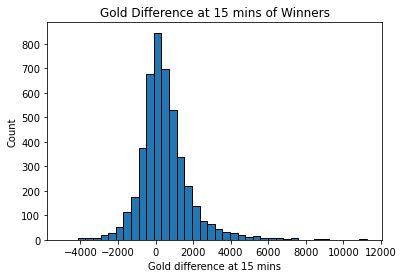

In [10]:
plt.hist(win_df['golddiffat15'], bins = 40, edgecolor = "black")
plt.xlabel("Gold difference at 15 mins")
plt.ylabel("Count")
plt.title("Gold Difference at 15 mins of Winners")
plt.show()

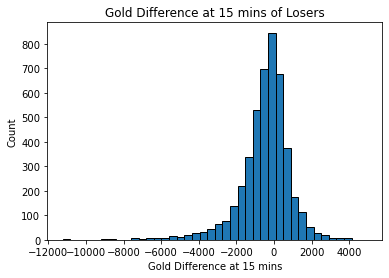

In [11]:
plt.hist(lose_df['golddiffat15'], bins = 40, edgecolor = "black")
plt.xlabel("Gold Difference at 15 mins")
plt.ylabel("Count")
plt.title("Gold Difference at 15 mins of Losers")
plt.show()


Having more gold than the opponent team is crucial to a win in League of Legends. In very basic terms, this gold advantage allows players to purchase more items, which means those players are more likely to win a fight against the opponents. Looking at the two graphs above, it looks like winning teams tend to have slightly more gold than the losing team. The gold difference at 15 minutes for the winners has more of a tail in the positive direction. Meanwhile, for the losers, it has more of a tail in the negative direction.

Even so, there isn't a clear and distinct difference between the two graphs. It doesn't provide enough evidence to support the fact that the first 15 minutes will determine the rest of the game.

## Winning Sides

In [12]:
win_df['side'].value_counts()

Blue    2346
Red     2214
Name: side, dtype: int64

In [13]:
sides = win_df['side'].replace(["Blue", "Red"], [1, 2])

In [14]:
slices = sides.value_counts()

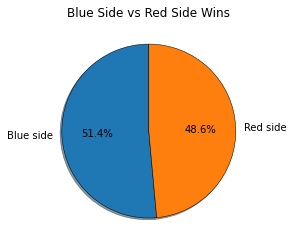

In [15]:
mylabels = ['Blue side', 'Red side']
wedges = {'edgecolor': "black", "linewidth": .5}

plt.pie(slices, labels = mylabels, autopct = '%1.1f%%', shadow = True, wedgeprops = wedges, startangle = 90)
plt.title("Blue Side vs Red Side Wins")
plt.show()

In League of Legends, there is a belief from casters, professional players, teams, and casual players alike that depending on which side you are on in the game, it will increase the odds of winning a game. If what side you are on can influence how likely a team is to win, it may be that the first 15 minutes are actually affected by this. However, looking at the graph, the split between the blue side and the red side winning is nearly 50/50. This makes me believe at first glance that which side you are on doesn't affect the outcome of the game.  

## Turret Plates

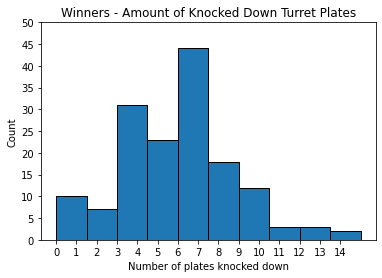

In [16]:
plt.hist(win_df['turretplates'], bins = 10, edgecolor = "black")
plt.xlabel("Number of plates knocked down")
plt.xticks(range(0,15))
plt.ylabel("Count")
plt.yticks(range(0, 55, 5))
plt.title("Winners - Amount of Knocked Down Turret Plates")
plt.show()

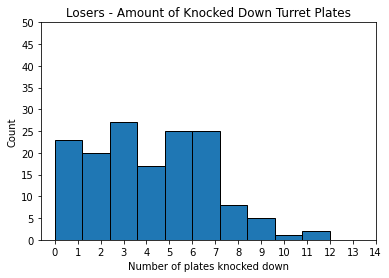

In [17]:
plt.hist(lose_df['turretplates'], bins = 10, edgecolor = "black")
plt.xlabel("Number of plates knocked down")
plt.xticks(range(0,15))
plt.ylabel("Count")
plt.yticks(range(0, 55, 5))
plt.title("Losers - Amount of Knocked Down Turret Plates")
plt.show()

In League of Legends games, each team has 10 turrets on the map. For the first 14 minutes, each turret has 5 turret plates which gives players gold when they destroy them. It also makes the turrets harder to kill within those first 14 minutes. The two graphs above show that winning teams tend to destroy more turret plates in those first 14 minutes. This could support the hypothesis that the first 15 minutes can determine a game.

## Kills / Assists / Deaths

<AxesSubplot:xlabel='killsat15', ylabel='Density'>

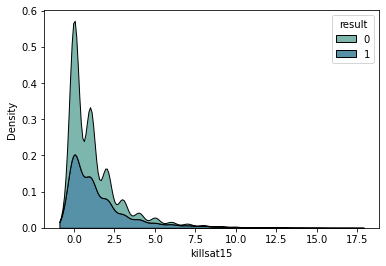

In [18]:
sn.kdeplot(data = lol_df, x = 'killsat15', hue = 'result', multiple = 'stack', palette = 'crest')

<AxesSubplot:xlabel='assistsat15', ylabel='Density'>

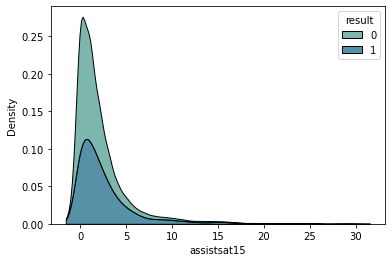

In [19]:
sn.kdeplot(data = lol_df, x = 'assistsat15', hue = 'result', multiple = 'stack', palette = 'crest')

<AxesSubplot:xlabel='deathsat15', ylabel='Density'>

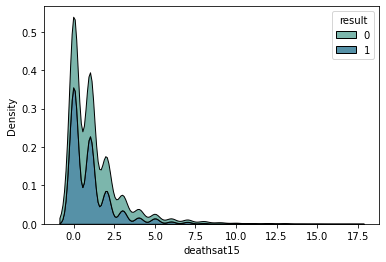

In [20]:
sn.kdeplot(data = lol_df, x = 'deathsat15', hue = 'result', multiple = 'stack', palette = 'crest')

The three graphs above display the kernel density estimation (KDE) for three different variables, kills at 15 minutes, assists at 15 minutes, deaths at 15 minutes. The graphs show that on for winning teams, they tend to have more kills and assists and less deaths than their opponents at the 15 minute mark. This can support my hypothesis that the first 15 minutes within the game can determine the outcome of the game.

# Conclusion

So far from the graphs above, there isn't a definitive answer to my hypothesis that the first 15 minutes of the game can determine the outcome of the game. The gold difference is inconclusive at best. However, the belief that a specific side of the map leads to a win didn't hold up at first glance, which is good for the hypothesis. The turret plates and basic kill, death, assist (KDA) stats were a decent indicator that the first 15 minutes may be important to the result of the game.

# Milestone 2

Variable definitions: https://oracleselixir.com/definitions

## Dropping Irrelevant Columns

The first step in the data cleaning process is to drop any columns that are not necessary to build out a model to determine if the first 15 minutes of a game are crucial to winning. 

In [21]:
# getting a quick look at the dataframe
lol_df.head()

,Unnamed: 0,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2460,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,1,Blue,top,Ssumday,oe:player:f35d122e169ccf24593a4d06927a3e2,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Renekton,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,3,0,1,11,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,9332.0,344.9908,0.196720,656.0074,495.7116,13.0,0.4806,12.0,0.4436,5.0,46.0,1.7006,11190,7603.0,281.0721,0.212986,9725.0,NaN,231.0,219.0,12.0,0.0,8.0,8.5397,3752.0,4729.0,72.0,3226.0,4487.0,74.0,526.0,242.0,-2.0,2.0,1.0,0.0,1.0,0.0,2.0,5487.0,6990.0,115.0,5153.0,7593.0,129.0,334.0,-603.0,-14.0,2.0,1.0,0.0,1.0,0.0,2.0
1,2461,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,2,Blue,jng,Closer,oe:player:96da046ebab4cac9bcba2c9afd85999,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Taliyah,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,2,0,7,11,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10652.0,393.7893,0.224546,550.6839,242.8835,21.0,0.7763,8.0,0.2957,7.0,48.0,1.7745,10241,6654.0,245.9889,0.186403,9460.0,NaN,172.0,22.0,150.0,84.0,35.0,6.3586,3238.0,3328.0,65.0,3238.0,3603.0,67.0,0.0,-275.0,-2.0,0.0,3.0,0.0,0.0,1.0,1.0,5219.0,5276.0,100.0,5047.0,6352.0,117.0,172.0,-1076.0,-17.0,0.0,3.0,0.0,0.0,1.0,1.0
2,2462,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,3,Blue,mid,Damonte,oe:player:b38e8427233eea81494ca1b3ec13f0a,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Twisted Fate,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,2,1,8,11,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.4067,0.4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,11308.0,418.0407,0.238374,419.8152,224.1035,11.0,0.4067,11.0,0.4067,6.0,35.0,1.2939,12335,8748.0,323.4011,0.245060,11600.0,NaN,232.0,224.0,8.0,8.0,0.0,8.5767,3944.0,4221.0,78.0,2848.0,3983.0,67.0,1096.0,238.0,11.0,1.0,2.0,1.0,0.0,1.0,1.0,6141.0,7214.0,136.0,4655.0,6738.0,121.0,1486.0,476.0,15.0,1.0,2.0,1.0,0.0,1.0,1.0
3,2463,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,4,Blue,bot,FBI,oe:player:73d2b65353d7b00e0f198ffdc085edc,100 Thieves,oe:team:4bd1751425ef6a9bc9d4d8e9385b4a6,Kai'Sa,Shen,Nidalee,Lillia,Jhin,Samira,1623,1,4,0

The first column I'm going to focus on is the participantid column. In the column there are 12 different values, 10 of them represent each player and the other 2, 100 and 200, represent the overall team id. I am going to remove the overall team rows because it just summarizes the player data. 

In [22]:
# determining there are zero null values in the participantid column
lol_df['participantid'].isnull().sum()

0

In [23]:
# double checking to make sure there are only 12 values for the column
lol_df['participantid'].value_counts()

1      760
2      760
3      760
4      760
5      760
6      760
7      760
8      760
9      760
10     760
100    760
200    760
Name: participantid, dtype: int64

In [24]:
# removing the first team row for each game
lol_df = lol_df[lol_df.participantid != 100]

In [25]:
# removing the second team row for each game
lol_df = lol_df[lol_df.participantid != 200]

In [26]:
# double checking that everything has been removed
lol_df['participantid'].value_counts()

1     760
2     760
3     760
4     760
5     760
6     760
7     760
8     760
9     760
10    760
Name: participantid, dtype: int64

In this next part, I am removing all the columns that are not relevant to the model. These include columns that cover the identity of each game, where to find the videos of gameplay, champion bans and picks, as well as opponent information. I removed the opponent information because it is already covered in their own unique row, so that information is redundant. 

In [27]:
# removing all the irrelevant information
refined_df = lol_df.drop(columns = ['Unnamed: 0', 'gameid', 'datacompleteness', 'url', 'league', 'year', 'split', 'playoffs', 'date',
                      'game', 'patch', 'participantid', 'position', 'playername', 'playerid', 'teamname', 'teamid', 'champion',
                      'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'ckpm', 'opp_dragons', 'opp_elementaldrakes', 'opp_elders', 
                      'opp_heralds', 'opp_barons', 'opp_towers', 'opp_turretplates', 'opp_inhibitors', 'opp_goldat10', 
                      'opp_xpat10', 'opp_csat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'opp_goldat15', 
                      'opp_xpat15', 'opp_csat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15'], axis = 1)

In [28]:
# double checking the columns were removed
refined_df.head()

,side,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,turretplates,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
0,Blue,1623,1,3,0,1,11,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9332.0,344.9908,0.196720,656.0074,495.7116,13.0,0.4806,12.0,0.4436,5.0,46.0,1.7006,11190,7603.0,281.0721,0.212986,9725.0,NaN,231.0,219.0,12.0,0.0,8.0,8.5397,3752.0,4729.0,72.0,526.0,242.0,-2.0,2.0,1.0,0.0,5487.0,6990.0,115.0,334.0,-603.0,-14.0,2.0,1.0,0.0
1,Blue,1623,1,2,0,7,11,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10652.0,393.7893,0.224546,550.6839,242.8835,21.0,0.7763,8.0,0.2957,7.0,48.0,1.7745,10241,6654.0,245.9889,0.186403,9460.0,NaN,172.0,22.0,150.0,84.0,35.0,6.3586,3238.0,3328.0,65.0,0.0,-275.0,-2.0,0.0,3.0,0.0,5219.0,5276.0,100.0,172.0,-1076.0,-17.0,0.0,3.0,0.0
2,Blue,1623,1,2,1,8,11,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.4067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11308.0,418.0407,0.238374,419.8152,224.1035,11.0,0.4067,11.0,0.4067,6.0,35.0,1.2939,12335,8748.0,323.4011,0.245060,11600.0,NaN,232.0,224.0,8.0,8.0,0.0,8.5767,3944.0,4221.0,78.0,1096.0,238.0,11.0,1.0,2.0,1.0,6141.0,7214.0,136.0,1486.0,476.0,15.0,1.0,2.0,1.0
3,Blue,1623,1,4,0,4,11,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13978.0,516.7468,0.294658,393.0869,255.3050,14.0,0.5176,6.0,0.2218,6.0,33.0,1.2200,13165,9578.0,354.0850,0.268309,11000.0,NaN,269.0,256.0,13.0,4.0,5.0,9.9445,3432.0,3634.0,93.0,256.0,465.0,13.0,0.0,0.0,0.0,6355.0,6463.0,154.0,1755.0,1087.0,34.0,0.0,0.0,0.0
4,Blue,1623,1,0,1,3,11,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2168.0,80.1479,0.045702,335.9335,377.6710,41.0,1.5157,20.0,0.7394,13.0,91.0,3.3641,6701,3114.0,115.1201,0.087242,6075.0,NaN,41.0,41.0,0.0,0.0,0.0,1.5157,2321.0,2490.0,20.0,248.0,-78.0,6.0,0.0,0.0,0.0,3526.0,3114.0,30.0,597.0,170.0,11.0,0.0,0.0,0.0


## Handling Null Values

In [29]:
# checking to see the shape of the dataframe to compare how many null values there are
refined_df.shape

(7600, 80)

In [30]:
# finding the number of null values
refined_df.isnull().sum()

side                           0
gamelength                     0
result                         0
kills                          0
deaths                         0
assists                        0
teamkills                      0
teamdeaths                     0
doublekills                    0
triplekills                    0
quadrakills                    0
pentakills                     0
firstblood                     0
firstbloodkill                 0
firstbloodassist               0
firstbloodvictim               0
team kpm                       0
firstdragon                 7600
dragons                     7600
elementaldrakes             7600
infernals                   7600
mountains                   7600
clouds                      7600
oceans                      7600
chemtechs                   7600
hextechs                    7600
dragons (type unknown)      7600
elders                      7600
firstherald                 7600
heralds                     7600
firstbaron

I have decided to remove all the columns that had any null values. Any column that had 7600 null values meant it didn't have any data at all. For monsterkillsownjungle and monsterkillsenemyjungle, it seems like those columns weren't tracked in later games, so I removed the columns.

In [31]:
# removed the columns
removed_df = refined_df.drop(columns = ['firstdragon', 'dragons', 'elementaldrakes', 'infernals', 'mountains', 'clouds', 
                                       'oceans', 'chemtechs', 'hextechs', 'dragons (type unknown)', 'elders', 'firstherald',
                                       'heralds', 'firstbaron', 'barons', 'firsttower', 'towers', 'firstmidtower',
                                       'firsttothreetowers', 'turretplates', 'gspd', 'monsterkillsownjungle', 
                                       'monsterkillsenemyjungle'])

In [32]:
# looking at the remaining columns
removed_df.columns

Index(['side', 'gamelength', 'result', 'kills', 'deaths', 'assists',
       'teamkills', 'teamdeaths', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'firstblood', 'firstbloodkill', 'firstbloodassist',
       'firstbloodvictim', 'team kpm', 'inhibitors', 'damagetochampions',
       'dpm', 'damageshare', 'damagetakenperminute',
       'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'earnedgoldshare', 'goldspent', 'total cs', 'minionkills',
       'monsterkills', 'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10',
       'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10',
       'goldat15', 'xpat15', 'csat15', 'golddiffat15', 'xpdiffat15',
       'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15'],
      dtype='object')

## Correlation Matrix

In [33]:
# run a correlation matrix
corr_matrix = removed_df.corr()

In [34]:
# looking at the correlation matrix
# can't use a heatmap because it is unreadable due to the amount of columns
corr_matrix

,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
gamelength,1.000000e+00,2.429064e-17,0.088873,0.120029,0.179421,1.614499e-01,1.609243e-01,0.029043,0.021078,-0.012940,-0.003632,-0.000563,-2.414207e-19,-0.000688,1.938794e-17,-1.671645e-01,0.053294,0.390566,0.097070,4.558751e-08,0.064846,0.190330,0.291153,0.082000,0.465194,0.209665,0.323949,0.463406,0.167751,0.576897,0.413447,-0.009734,-1.683940e-08,0.606646,0.328645,0.230463,0.120732,-0.013029,-0.054594,0.002261,0.014609,2.980215e-18,4.537901e-18,-2.355068e-18,-0.105726,-0.145743,-0.116649,-0.058789,-0.001028,0.021700,5.658740e-18,-2.771385e-18,0.000000,-0.132973,-0.170425,-0.152287
result,2.429064e-17,1.000000e+00,0.390496,-0.527835,0.583584,7.093912e-01,-7.076771e-01,0.285276,0.162862,0.077317,0.036822,0.107116,6.403509e-02,0.076292,-6.403509e-02,7.026659e-01,0.345913,0.168329,0.202071,-6.160636e-09,-0.083192,0.025096,0.016625,0.019818,0.072712,0.085611,0.004375,0.096237,0.117250,0.293979,0.327706,0.385554,2.994977e-08,0.159988,0.047870,0.012246,0.056416,0.055945,0.103865,0.050206,0.021760,2.214491e-01,1.886690e-01,7.219645e-02,0.111684,0.140415,-0.122301,0.152878,0.070804,0.027011,3.113860e-01,2.603834e-01,0.094834,0.160115,0.205995,-0.182334
kills,8.887271e-02,3.904960e-01,1.000000,-0.200280,0.125741,5.504663e-01,-1.651702e-01,0.713908,0.456046,0.255560,0.133308,0.123446,2.016648e-01,-0.021107,-5.244550e-02,5.132194e-01,0.284349,0.603538,0.642660,4.755497e-01,0.134186,0.037852,-0.297302,-0.332649,0.009748,-0.015656,-0.275202,-0.195827,-0.244627,0.639902,0.692911,0.731331,5.486238e-01,0.567835,0.424052,0.298483,0.153748,0.415874,0.499314,0.266239,0.371380,2.603125e-01,1.468573e-01,8.348964e-02,0.414843,0.023022,-0.039883,0.563545,0.335585,0.382365,3.407451e-01,2.291042e-01,0.117892,0.562655,0.038405,-0.060259
deaths,1.200285e-01,-5.278346e-01,-0.200280,1.000000,-0.178878,-2.238018e-01,7.458692e-01,-0.167405,-0.105376,-0.052686,-0.026861,-0.080547,-3.582776e-02,-0.067877,2.236226e-01,-2.851932e-01,-0.221131,-0.044894,-0.096026,-9.717382e-02,0.295637,0.178504,0.054823,0.023039,-0.053395,-0.104679,0.089307,0.004279,-0.049625,-0.187415,-0.236476,-0.332191,-1.454972e-01,-0.095462,-0.138556,-0.110546,-0.026529,-0.190885,-0.138779,-0.095823,-0.133599,-2.283205e-01,-2.035636e-01,-8.132775e-02,-0.022694,-0.004369,0.467880,-0.185316,-0.132492,-0.149303,-3.086148e-01,-2.915006e-01,-0.118651,-0.052673,-0.028143,0.612093
assists,1.794210e-01,5.835837e-01,0.125741,-0.178878,1.000000,7.715637e-01,-2.630992e-01,0.047068,0.004185,-0.004676,-0.008259,0.146077,1.175510e-02,0.168478,-5.178597e-02,6.960455e-01,0.129657,0.096289,0.063675,-2.161559e-01,-0.006008,0.169387,0.287175,0.263803,0.164595,0.134470,0.287750,0.344960,0.331181,0.083992,0.052428,0.003337,-2.988982e-01,0.023972,-0.225065,-0.223233,0.036424,-0.298173,-0.135782,-0.174719,-0.275360,1.408243e-01,1.248452e-01,9.108808e-03,0.053444,0.360847,-0.026516,-0.115055,-0.175644,-0.279860,1.956178e-01,1.906221e-01,0.021243,0.067009,0.513149,-0.052850
teamkills,1.614499e-01,7.093912e-01,0.550466,-0.223802,0.771564,1.000000e+00,-3.000550e-01,0.350098,0.192181,0.106359,0.049741,0.120105,7.490968e-02,0.082891,-7.490968e-02,9.323356e-01,0.270093,0.341206,0.341676,2.983527e-08,0.073870,0.152600,0.048853,0.016031,0.091620,0.055151,0.057911,0.135480,0.102499,0.376465,0.382586,0.378384,1.975390e-08,0.292290,0.053620,0.017904,0.055567,0.004970,0.130208,0.035026,-0.004153,2.173316e-01,1.712368e-0

## Dummy Variable

I need to create a dummy variable for the side column as it is categorical right now ('blue' or 'red').

In [35]:
dummy_df = pd.get_dummies(removed_df)
dummy_df.head()

,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,side_Blue,side_Red
0,1623,1,3,0,1,11,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,1.0,9332.0,344.9908,0.196720,656.0074,495.7116,13.0,0.4806,12.0,0.4436,5.0,46.0,1.7006,11190,7603.0,281.0721,0.212986,9725.0,231.0,219.0,12.0,8.5397,3752.0,4729.0,72.0,526.0,242.0,-2.0,2.0,1.0,0.0,5487.0,6990.0,115.0,334.0,-603.0,-14.0,2.0,1.0,0.0,1,0
1,1623,1,2,0,7,11,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4067,0.0,10652.0,393.7893,0.224546,550.6839,242.8835,21.0,0.7763,8.0,0.2957,7.0,48.0,1.7745,10241,6654.0,245.9889,0.186403,9460.0,172.0,22.0,150.0,6.3586,3238.0,3328.0,65.0,0.0,-275.0,-2.0,0.0,3.0,0.0,5219.0,5276.0,100.0,172.0,-1076.0,-17.0,0.0,3.0,0.0,1,0
2,1623,1,2,1,8,11,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.4067,1.0,11308.0,418.0407,0.238374,419.8152,224.1035,11.0,0.4067,11.0,0.4067,6.0,35.0,1.2939,12335,8748.0,323.4011,0.245060,11600.0,232.0,224.0,8.0,8.5767,3944.0,4221.0,78.0,1096.0,238.0,11.0,1.0,2.0,1.0,6141.0,7214.0,136.0,1486.0,476.0,15.0,1.0,2.0,1.0,1,0
3,1623,1,4,0,4,11,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4067,1.0,13978.0,516.7468,0.294658,393.0869,255.3050,14.0,0.5176,6.0,0.2218,6.0,33.0,1.2200,13165,9578.0,354.0850,0.268309,11000.0,269.0,256.0,13.0,9.9445,3432.0,3634.0,93.0,256.0,465.0,13.0,0.0,0.0,0.0,6355.0,6463.0,154.0,1755.0,1087.0,34.0,0.0,0.0,0.0,1,0
4,1623,1,0,1,3,11,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4067,0.0,2168.0,80.1479,0.045702,335.9335,377.6710,41.0,1.5157,20.0,0.7394,13.0,91.0,3.3641,6701,3114.0,115.1201,0.087242,6075.0,41.0,41.0,0.0,1.5157,2321.0,2490.0,20.0,248.0,-78.0,6.0,0.0,0.0,0.0,3526.0,3114.0,30.0,597.0,170.0,11.0,0.0,0.0,0.0,1,0


## Spliting the Dataset

In [36]:
# creating the features
features = dummy_df.drop(columns = ['result'], axis = 1)

In [37]:
# creating the target
target = dummy_df['result']

In [38]:
# spliting the dataset into training and test sets
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.2)

# Milestone 3

For Milestone 3, I decided to make a major pivot. In the previous milestone, I had removed all the team based stat rows and focused on the individual player stats. However, this meant that I lost many of the important columns that have an easy split between happening before the 15 minute mark and happening after the 15 minute mark. So instead, I have gone back and decided to only use the team based stat rows in the dataset. I believe that this will give better results for the model.

In [39]:
# importing the data into a dataframe
lol_df = pd.read_csv("2022_LoL_Data.csv")
lol_df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,top,Soboro,oe:player:38e0af7278d6769d0c81d7c4b47ac1e,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,3,2,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15768.0,552.2942,0.278784,1072.3993,777.7933,8.0,0.2802,6.0,0.2102,5.0,26.0,0.9107,10934,7164.0,250.9282,0.253859,10275.0,NaN,231.0,220.0,11.0,NaN,NaN,8.0911,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,jng,Raptor,oe:player:637ed20b1e41be1c51bd1a4cb211357,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,5,6,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11765.0,412.0841,0.208009,944.2732,650.1576,6.0,0.2102,18.0,0.6305,6.0,48.0,1.6813,9138,5368.0,188.0210,0.190220,8750.0,NaN,148.0,33.0,115.0,NaN,NaN,5.1839,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,mid,Feisty,oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,2,3,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14258.0,499.4046,0.252086,581.6462,227.7758,19.0,0.6655,7.0,0.2452,7.0,29.0,1.0158,9715,5945.0,208.2312,0.210665,8725.0,NaN,193.0,177.0,16.0,NaN,NaN,6.7601,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,bot,Gamin,oe:player:998b3e49b01ecc41eacc392477a98cf,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,4,2,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

In [40]:
# checking out the shape of the dataframe
lol_df.shape

(65328, 123)

In [41]:
# only keeping the data for the total stats of each team per game
team_df = lol_df[(lol_df.participantid == 100) | (lol_df.participantid == 200)]

In [42]:
# checking to make sure it worked
team_df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,100,Blue,team,NaN,NaN,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,NaN,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.3152,0.9807,0.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0,1.0,5.0,0.0,0.0,1.0,56560.0,1981.0858,NaN,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,NaN,44570.0,-0.028312,NaN,680.0,160.0,NaN,NaN,29.4221,16218.0,18213.0,322.0,14695.0,18076.0,330.0,1523.0,137.0,-8.0,3.0,5.0,0.0,0.0,0.0,3.0,24806.0,28001.0,487.0,24699.0,29618.0,510.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,6.0,18.0,5.0
11,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,200,Red,team,NaN,NaN,Nongshim RedForce Challengers,oe:team:d2dc3681437e2beb2bb4742477108ff,NaN,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.6655,0.9807,1.0,3.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,5.0,1.0,0.0,79912.0,2799.0193,NaN,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,NaN,45850.0,0.028312,NaN,792.0,184.0,NaN,NaN,34.1856,14695.0,18076.0,330.0,16218.0,18213.0,322.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,3.0,5.0,0.0,24699.0,29618.0,510.0,24806.0,28001.0,487.0,-107.0,1617.0,23.0,6.0,18.0,5.0,5.0,10.0,6.0
22,ESPORTSTMNT01_2690219,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 08:38:24,1,12.01,100,Blue,team,NaN,NaN,T1 Challengers,oe:team:6dcacec00a6ba7576c5ab7f30c995cd,NaN,Sona,Jarvan IV,Caitlyn,Lulu,Lucian,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0851,0.5393,0.0,1.0,4.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,3.0,11.0,0.0,0.0,2.0,3.0,0.0,2.0,59579.0,1690.9839,NaN,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,NaN,53945.0,-0.207137,NaN,994.0,215.0,NaN,NaN,34.3141,14939.0,17462.0,317.0,16558.0,19048.0,344.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,3.0,3.0,1.0,23522.0,28848.0,533.0,25285.0,29754.0,555.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,3.0,3.0,1.0
23,ESPORTSTMNT01_2690219,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 08:38:24,1,12.01,200,Red,team,NaN,NaN,Liiv SANDBOX Challengers,oe:team:5380cdbc2ad2b8082624f48f99f6672,NaN,LeBlanc,Yuumi,Twisted Fate,Karma,Alistar,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.4541,0.5393,1.0,4.0,1.0,4.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,11.0,3.0,1.0,1.0,3.0,2.0,2.0,0.0,74855.0,2124.5506,NaN,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,

In [43]:
# checking the shape of the dataframe
team_df.shape

(10888, 123)

## Graphs

In [44]:
# creating a new dataframe of just wins in the result column
win_df = team_df[team_df['result'] == 1]
win_df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
11,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,200,Red,team,NaN,NaN,Nongshim RedForce Challengers,oe:team:d2dc3681437e2beb2bb4742477108ff,NaN,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.6655,0.9807,1.0,3.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,5.0,1.0,0.0,79912.0,2799.0193,NaN,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,NaN,45850.0,0.028312,NaN,792.0,184.0,NaN,NaN,34.1856,14695.0,18076.0,330.0,16218.0,18213.0,322.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,3.0,5.0,0.0,24699.0,29618.0,510.0,24806.0,28001.0,487.0,-107.0,1617.0,23.0,6.0,18.0,5.0,5.0,10.0,6.0
23,ESPORTSTMNT01_2690219,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 08:38:24,1,12.01,200,Red,team,NaN,NaN,Liiv SANDBOX Challengers,oe:team:5380cdbc2ad2b8082624f48f99f6672,NaN,LeBlanc,Yuumi,Twisted Fate,Karma,Alistar,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.4541,0.5393,1.0,4.0,1.0,4.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,11.0,3.0,1.0,1.0,3.0,2.0,2.0,0.0,74855.0,2124.5506,NaN,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,NaN,66410.0,0.207137,NaN,1013.0,244.0,NaN,NaN,35.6764,16558.0,19048.0,344.0,14939.0,17462.0,317.0,1619.0,1586.0,27.0,3.0,3.0,1.0,1.0,1.0,3.0,25285.0,29754.0,555.0,23522.0,28848.0,533.0,1763.0,906.0,22.0,3.0,3.0,1.0,1.0,1.0,3.0
34,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,100,Blue,team,NaN,NaN,Oh My God,oe:team:f4c4528c6981e104a11ea7548630c23,NaN,Renekton,Lee Sin,Caitlyn,Jayce,Camille,1365,1,13,6,35,13,6,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5714,0.8352,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,8.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,40086.0,1762.0220,NaN,2263.2527,NaN,79.0,3.4725,33.0,1.4505,32.0,162.0,7.1209,45468,30167.0,1326.0220,NaN,36908.0,-0.005862,NaN,NaN,172.0,98.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,ESPORTSTMNT01_2690227,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 09:51:16,1,12.01,100,Blue,team,NaN,NaN,KT Rolster Challengers,oe:team:b9733b8e8aa341319bbaf1035198a28,NaN,Syndra,Caitlyn,Karma,Gragas,Vex,1972,1,14,5,42,14,5,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.4260,0.5781,1.0,4.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,11.0,2.0,1.0,1.0,1.0,4.0,2.0,0.0,67376.0,2049.9797,NaN,2327.8905,1776.2677,119.0,3.6207,51.0,1.5517,68.0,264.0,8.0325,62868,41372.0,1258.7830,NaN,5

In [45]:
# creating a new dataframe of just loses in the result column
lose_df = team_df[team_df['result'] == 0]
lose_df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,100,Blue,team,NaN,NaN,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,NaN,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.3152,0.9807,0.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0,1.0,5.0,0.0,0.0,1.0,56560.0,1981.0858,NaN,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,NaN,44570.0,-0.028312,NaN,680.0,160.0,NaN,NaN,29.4221,16218.0,18213.0,322.0,14695.0,18076.0,330.0,1523.0,137.0,-8.0,3.0,5.0,0.0,0.0,0.0,3.0,24806.0,28001.0,487.0,24699.0,29618.0,510.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,6.0,18.0,5.0
22,ESPORTSTMNT01_2690219,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 08:38:24,1,12.01,100,Blue,team,NaN,NaN,T1 Challengers,oe:team:6dcacec00a6ba7576c5ab7f30c995cd,NaN,Sona,Jarvan IV,Caitlyn,Lulu,Lucian,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0851,0.5393,0.0,1.0,4.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,3.0,11.0,0.0,0.0,2.0,3.0,0.0,2.0,59579.0,1690.9839,NaN,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,NaN,53945.0,-0.207137,NaN,994.0,215.0,NaN,NaN,34.3141,14939.0,17462.0,317.0,16558.0,19048.0,344.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,3.0,3.0,1.0,23522.0,28848.0,533.0,25285.0,29754.0,555.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,3.0,3.0,1.0
35,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,200,Red,team,NaN,NaN,ThunderTalk Gaming,oe:team:df80f468a3f9a722df056fe9104f052,NaN,Samira,Diana,Akali,LeBlanc,Rumble,1365,0,6,13,11,6,13,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.2637,0.8352,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,3.0,8.0,NaN,NaN,NaN,NaN,0.0,1.0,30417.0,1337.0110,NaN,2541.8901,NaN,64.0,2.8132,34.0,1.4945,26.0,155.0,6.8132,38538,23237.0,1021.4066,NaN,37125.0,0.005862,NaN,NaN,116.0,94.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,ESPORTSTMNT01_2690227,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 09:51:16,1,12.01,200,Red,team,NaN,NaN,Gen.G Challengers,oe:team:ff0118d68f738d57ce78b30839e4f16,NaN,Lee Sin,Twisted Fate,Ryze,Ezreal,Lucian,1972,0,5,14,11,5,14,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.1521,0.5781,0.0,1.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,11.0,0.0,0.0,4.0,1.0,0.0,2.0,46120.0,1403.2454,NaN,2647.3022,1957.3327,101.0,3.0730,54.0,1.6430,45.0,239.0,7.2718,52177,30681.0,933.4990,NaN,48800.0,-0.165672,Na

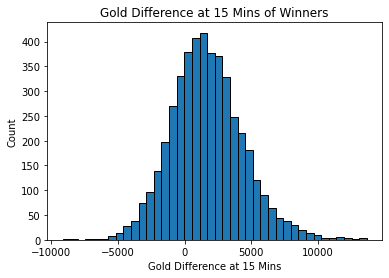

In [46]:
# building out a gold difference histogram of the winning games
plt.hist(win_df['golddiffat15'], bins = 40, edgecolor = "black")
plt.xlabel("Gold Difference at 15 Mins")
plt.ylabel("Count")
plt.title("Gold Difference at 15 Mins of Winners")
plt.show()

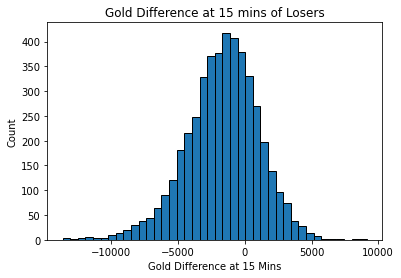

In [47]:
# building out a gold difference histogram of the losing games
plt.hist(lose_df['golddiffat15'], bins = 40, edgecolor = "black")
plt.xlabel("Gold Difference at 15 Mins")
plt.ylabel("Count")
plt.title("Gold Difference at 15 mins of Losers")
plt.show()

Having more gold than the opponent team is crucial to a win in League of Legends. In very basic terms, this gold advantage allows players to purchase more items, which means those players are more likely to win a fight against the opponents. Looking at the two graphs above, it looks like winning teams tend to have slightly more gold than the losing team. The gold difference at 15 minutes for the winners has more of a tail in the positive direction. Meanwhile, for the losers, it has more of a tail in the negative direction.

Even so, there isn't a clear and distinct difference between the two graphs. It doesn't provide enough evidence to support the fact that the first 15 minutes will determine the rest of the game.

### Winning Sides

In [48]:
# checking the amount of wins per team side
win_df['side'].value_counts()

Blue    2753
Red     2691
Name: side, dtype: int64

In [49]:
# replacing categorical data with numbers
sides = win_df['side'].replace(["Blue", "Red"], [1, 2])

In [50]:
# saving amount of wins per team into a variable
slices = sides.value_counts()

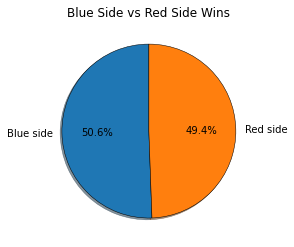

In [51]:
# creating a pie chart to display the wins of each side in the game
mylabels = ['Blue side', 'Red side']
wedges = {'edgecolor': 'black', 'linewidth': .5}

plt.pie(slices, labels = mylabels, autopct = "%1.1f%%", shadow = True, wedgeprops = wedges, startangle = 90)
plt.title("Blue Side vs Red Side Wins")
plt.show()

In League of Legends, there is a belief from casters, professional players, teams, and casual players alike that depending on which side you are on in the game, it will increase the odds of winning a game. If what side you are on can influence how likely a team is to win, it may be that the first 15 minutes are actually affected by this. However, looking at the graph, the split between the blue side and the red side winning is nearly 50/50. This makes me believe at first glance that which side you are on doesn't affect the outcome of the game.  

### Turret Plates

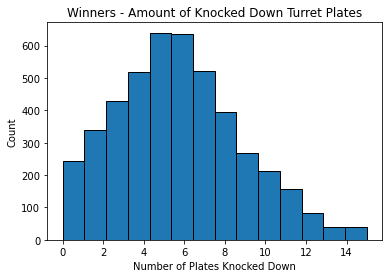

In [52]:
# creating a histogram of the turretplates that were knocked down by winners
plt.hist(win_df['turretplates'], bins = 14, edgecolor = 'black')
plt.xlabel("Number of Plates Knocked Down")
plt.ylabel("Count")
plt.title("Winners - Amount of Knocked Down Turret Plates")
plt.show()

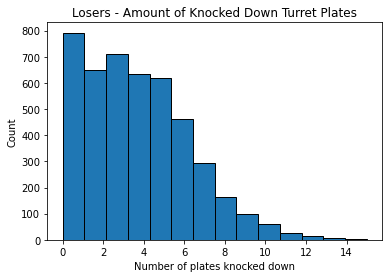

In [53]:
# creating a histogram of the turretplates that were knocked down by losers
plt.hist(lose_df['turretplates'], bins = 14, edgecolor = "black")
plt.xlabel("Number of plates knocked down")
plt.ylabel("Count")
plt.title("Losers - Amount of Knocked Down Turret Plates")
plt.show()

In League of Legends games, each team has 10 turrets on the map. For the first 14 minutes, each turret has 5 turret plates which gives players gold when they destroy them. It also makes the turrets harder to kill within those first 14 minutes. The two graphs above show that winning teams tend to destroy more turret plates in those first 14 minutes. This could support the hypothesis that the first 15 minutes can determine a game.

### Kills / Assists / Deaths

<AxesSubplot:xlabel='killsat15', ylabel='Density'>

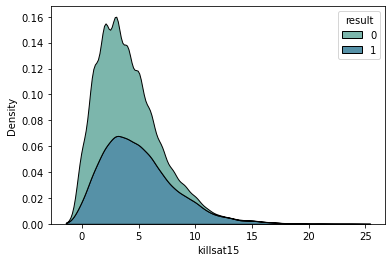

In [54]:
sn.kdeplot(data = team_df, x = 'killsat15', hue = 'result', multiple = 'stack', palette = 'crest')

<AxesSubplot:xlabel='assistsat15', ylabel='Density'>

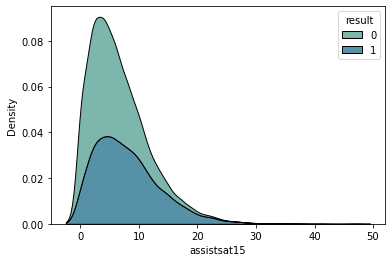

In [55]:
sn.kdeplot(data = team_df, x = 'assistsat15', hue = 'result', multiple = 'stack', palette = 'crest')

<AxesSubplot:xlabel='deathsat15', ylabel='Density'>

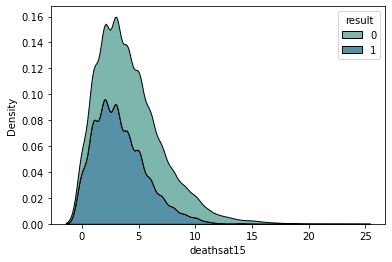

In [56]:
sn.kdeplot(data = team_df, x = 'deathsat15', hue = 'result', multiple = 'stack', palette = 'crest')

The three graphs above display the kernel density estimation (KDE) for three different variables, kills at 15 minutes, assists at 15 minutes, deaths at 15 minutes. The graphs show that on for winning teams, they tend to have more kills and assists and less deaths than their opponents at the 15 minute mark. This can support my hypothesis that the first 15 minutes within the game can determine the outcome of the game.

## Cleaning the Data

### Dropping Irrelevant Columns

In [57]:
# quick check of the dataframe again
team_df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,100,Blue,team,NaN,NaN,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,NaN,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.3152,0.9807,0.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0,1.0,5.0,0.0,0.0,1.0,56560.0,1981.0858,NaN,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,NaN,44570.0,-0.028312,NaN,680.0,160.0,NaN,NaN,29.4221,16218.0,18213.0,322.0,14695.0,18076.0,330.0,1523.0,137.0,-8.0,3.0,5.0,0.0,0.0,0.0,3.0,24806.0,28001.0,487.0,24699.0,29618.0,510.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,6.0,18.0,5.0
11,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,200,Red,team,NaN,NaN,Nongshim RedForce Challengers,oe:team:d2dc3681437e2beb2bb4742477108ff,NaN,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.6655,0.9807,1.0,3.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,5.0,1.0,0.0,79912.0,2799.0193,NaN,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,NaN,45850.0,0.028312,NaN,792.0,184.0,NaN,NaN,34.1856,14695.0,18076.0,330.0,16218.0,18213.0,322.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,3.0,5.0,0.0,24699.0,29618.0,510.0,24806.0,28001.0,487.0,-107.0,1617.0,23.0,6.0,18.0,5.0,5.0,10.0,6.0
22,ESPORTSTMNT01_2690219,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 08:38:24,1,12.01,100,Blue,team,NaN,NaN,T1 Challengers,oe:team:6dcacec00a6ba7576c5ab7f30c995cd,NaN,Sona,Jarvan IV,Caitlyn,Lulu,Lucian,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0851,0.5393,0.0,1.0,4.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,3.0,11.0,0.0,0.0,2.0,3.0,0.0,2.0,59579.0,1690.9839,NaN,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,NaN,53945.0,-0.207137,NaN,994.0,215.0,NaN,NaN,34.3141,14939.0,17462.0,317.0,16558.0,19048.0,344.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,3.0,3.0,1.0,23522.0,28848.0,533.0,25285.0,29754.0,555.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,3.0,3.0,1.0
23,ESPORTSTMNT01_2690219,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 08:38:24,1,12.01,200,Red,team,NaN,NaN,Liiv SANDBOX Challengers,oe:team:5380cdbc2ad2b8082624f48f99f6672,NaN,LeBlanc,Yuumi,Twisted Fate,Karma,Alistar,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.4541,0.5393,1.0,4.0,1.0,4.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,11.0,3.0,1.0,1.0,3.0,2.0,2.0,0.0,74855.0,2124.5506,NaN,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,

In [58]:
# removing all the unnecessary columns from the dataframe
refined_df = team_df.drop(columns = ['gameid', 'datacompleteness', 'url', 'league', 'year', 'split', 'playoffs', 'date',
                      'game', 'patch', 'participantid', 'position', 'playername', 'playerid', 'teamname', 'teamid', 'champion',
                      'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'ckpm', 'opp_dragons', 'opp_elementaldrakes', 'opp_elders', 
                      'opp_heralds', 'opp_barons', 'opp_towers', 'opp_turretplates', 'opp_inhibitors', 'opp_goldat10', 
                      'opp_xpat10', 'opp_csat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'opp_goldat15', 
                      'opp_xpat15', 'opp_csat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15'], axis = 1)

In [59]:
# making sure it worked properly
refined_df.head()

,side,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,turretplates,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
10,Blue,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,56560.0,1981.0858,NaN,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,NaN,44570.0,-0.028312,NaN,680.0,160.0,NaN,NaN,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0
11,Red,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,79912.0,2799.0193,NaN,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,NaN,45850.0,0.028312,NaN,792.0,184.0,NaN,NaN,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0
22,Blue,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,59579.0,1690.9839,NaN,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,NaN,53945.0,-0.207137,NaN,994.0,215.0,NaN,NaN,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0
23,Red,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,2.0,1.0,11.0,1.0,1.0,3.0,2.0,74855.0,2124.5506,NaN,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,NaN,66410.0,0.207137,NaN,1013.0,244.0,NaN,NaN,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0
34,Blue,1365,1,13,6,35,13,6,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5714,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,8.0,NaN,NaN,NaN,1.0,40086.0,1762.0220,NaN,2263.2527,NaN,79.0,3.4725,33.0,1.4505,32.0,162.0,7.1209,45468,30167.0,1326.0220,NaN,36908.0,-0.005862,NaN,NaN,172.0,98.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# double checking the new shape of the dataframe
refined_df.shape

(10888, 80)

I dropped all the columns above because they are not necessary to predicting if the first 15 minutes of the game is important. Any of the columns labeled opp_* mean that it is the opponent's stats being tracked against that team. I removed those columns because that data is already reflected in their own respective team row. This will help slim down the dataset and remove duplication of data.

### Handling Null Values

In [61]:
# checking to see how many null values are in the dataframe
refined_df.isnull().sum()

side                            0
gamelength                      0
result                          0
kills                           0
deaths                          0
assists                         0
teamkills                       0
teamdeaths                      0
doublekills                  1738
triplekills                  1738
quadrakills                  1738
pentakills                   1738
firstblood                      2
firstbloodkill              10888
firstbloodassist            10888
firstbloodvictim            10888
team kpm                        0
firstdragon                  1738
dragons                         0
elementaldrakes              1826
infernals                    1738
mountains                    1738
clouds                       1738
oceans                       1738
chemtechs                    1826
hextechs                     1826
dragons (type unknown)       8830
elders                       1738
firstherald                  1738
heralds       

I am going to remove any column that contains only null values because it brings no benefit to the dataset. Plus, I can't predict or estimate what those values should be in the first place. 

In [62]:
# removing columns that have all null values
removed_df1 = refined_df.drop(columns = ['firstbloodkill', 'firstbloodassist',
                                         'firstbloodvictim', 'damageshare',
                                         'earnedgoldshare', 'total cs',
                                         'monsterkillsownjungle', 
                                         'monsterkillsenemyjungle'], 
                             axis = 1)
removed_df1.head()

,side,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,turretplates,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
10,Blue,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,56560.0,1981.0858,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,44570.0,-0.028312,680.0,160.0,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0
11,Red,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,79912.0,2799.0193,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,45850.0,0.028312,792.0,184.0,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0
22,Blue,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,59579.0,1690.9839,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,53945.0,-0.207137,994.0,215.0,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0
23,Red,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,2.0,1.0,11.0,1.0,1.0,3.0,2.0,74855.0,2124.5506,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,66410.0,0.207137,1013.0,244.0,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0
34,Blue,1365,1,13,6,35,13,6,NaN,NaN,NaN,NaN,0.0,0.5714,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,8.0,NaN,NaN,NaN,1.0,40086.0,1762.0220,2263.2527,NaN,79.0,3.4725,33.0,1.4505,32.0,162.0,7.1209,45468,30167.0,1326.0220,36908.0,-0.005862,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the null values above, it seems to show a pattern with the different columns that have 1738 null values. It seems that the null values are connected across all of the columns that have 1738 null values. For that reason, I am going to remove all the null values from a specific column containing 1738 null values to see if that will eliminate all the null values for the rest of the columns. 

In [63]:
# removed null values from the doublekills column
removed_df2 = removed_df1[removed_df1['doublekills'].notna()]

In [64]:
# checking where the rest of the null values are located
removed_df2.isnull().sum()

side                           0
gamelength                     0
result                         0
kills                          0
deaths                         0
assists                        0
teamkills                      0
teamdeaths                     0
doublekills                    0
triplekills                    0
quadrakills                    0
pentakills                     0
firstblood                     0
team kpm                       0
firstdragon                    0
dragons                        0
elementaldrakes               88
infernals                      0
mountains                      0
clouds                         0
oceans                         0
chemtechs                     88
hextechs                      88
dragons (type unknown)      8830
elders                         0
firstherald                    0
heralds                        0
firstbaron                     0
barons                         0
firsttower                     0
towers    

In [65]:
# checking the shape
removed_df2.shape

(9150, 72)

Looking at the null value data now, there are only a few columns left over with null values. At this point, I did a deep dive into the dataset to figure out why there were null values for the different dragon columns and the turret plates column. I can safely say that there were meant to be a 0 instead of a null value for each of the missing values in the different columns.

In [66]:
# replaced the rest of the null values with 0
cleaned_df = removed_df2.fillna(0)

In [67]:
# double checking that it worked properly
cleaned_df.isnull().sum()

side                        0
gamelength                  0
result                      0
kills                       0
deaths                      0
assists                     0
teamkills                   0
teamdeaths                  0
doublekills                 0
triplekills                 0
quadrakills                 0
pentakills                  0
firstblood                  0
team kpm                    0
firstdragon                 0
dragons                     0
elementaldrakes             0
infernals                   0
mountains                   0
clouds                      0
oceans                      0
chemtechs                   0
hextechs                    0
dragons (type unknown)      0
elders                      0
firstherald                 0
heralds                     0
firstbaron                  0
barons                      0
firsttower                  0
towers                      0
firstmidtower               0
firsttothreetowers          0
turretplat

### Breakdown of Remaining Columns

Below is the chart that breaks down the different columns into whether it occurs in the first 15 minutes of the game, after the first 15 minutes of the game, and if it is not time dependent. For the columns that occur in the first 15 minutes of the game, it is because that was when the stat was grabbed or because those events (firstdragon, firstherald, turretplate) all end before the first 15 minutes of the game. The columns that occur after the first 15 minutes of the game is because those objectives spawn in the game after the first 15 minutes. Every other column has data that is collected throughout the entirety of each game.

| Occurs within first 15 mins | Occurs after first 15 mins | Not time dependent |
| :- | :- | :- |
| firstdragon | elders | side |
| firstherald | firstbaron | gamelength |
| turretplates | barons | result |
| goldat10 |  | kills |
| xpat10 |  | deaths |
|csat10 |  | assists |
| golddiffat10 |  | teamkills |
| xpdiffat10 |  | teamdeaths |
| csdiffat10 |  | doublekills |
| killsat10 |  | triplekills |
| assistsat10 |  | quadrakills |
| deathsat10 |  | pentakills |
| goldat15 |  | firstblood |
| xpat15 |  | team kpm |
| csat15 |  | dragons |
| killsat15 |  | elementaldrakes |
| assistsat15 |  | infernals |
| deathsat15 |  | mountains |
|  |  | clouds |
|  |  | oceans |
|  |  | chemtechs |
|  |  | hextechs |
|  |  | dragons (type unknown) |
|  |  | heralds |
|  |  | firsttower |
|  |  | towers |
|  |  | firstmidtower |
|  |  | firsttothreetowers |
|  |  | inhibitors |
|  |  | damagetochampions |
|  |  | dpm |
|  |  | damagetakenperminute |
|  |  | damagemitigatedperminute |
|  |  | wardsplaced |
|  |  | wcpm |
|  |  | controlwardsbought |
|  |  | visionscore |
|  |  | vspm |
|  |  | totalgold |
|  |  | earnedgold |
|  |  | earned gpm |
|  |  | goldspent |
|  |  | gspd |
|  |  | minionkills |
|  |  | monsterkills |
|  |  | cspm  |

### Dummy Variable

In [68]:
# creating dummy variables for the categorical data (side)
dummy_df = pd.get_dummies(cleaned_df)
dummy_df.head()

,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,turretplates,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,side_Blue,side_Red
10,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,56560.0,1981.0858,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,44570.0,-0.028312,680.0,160.0,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,1,0
11,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,79912.0,2799.0193,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,45850.0,0.028312,792.0,184.0,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0,0,1
22,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,59579.0,1690.9839,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,53945.0,-0.207137,994.0,215.0,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,1,0
23,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,11.0,1.0,1.0,3.0,2.0,74855.0,2124.5506,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,66410.0,0.207137,1013.0,244.0,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0,0,1
46,1972,1,14,5,42,14,5,3.0,1.0,0.0,0.0,0.0,0.4260,1.0,4.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,2.0,67376.0,2049.9797,2327.8905,1776.2677,119.0,3.6207,51.0,1.5517,68.0,264.0,8.0325,62868,41372.0,1258.7830,57615.0,0.165672,874.0,269.0,34.7769,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,1191.0,2298.0,15.0,3.0,8.0,1.0,1,0


### Splitting the Dataset

In [69]:
# creating the features
features = dummy_df.drop(columns = ['result'], axis = 1)
features.head()

,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,turretplates,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,side_Blue,side_Red
10,1713,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,56560.0,1981.0858,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,44570.0,-0.028312,680.0,160.0,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,1,0
11,1713,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,79912.0,2799.0193,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,45850.0,0.028312,792.0,184.0,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0,0,1
22,2114,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,59579.0,1690.9839,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,53945.0,-0.207137,994.0,215.0,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,1,0
23,2114,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,11.0,1.0,1.0,3.0,2.0,74855.0,2124.5506,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,66410.0,0.207137,1013.0,244.0,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0,0,1
46,1972,14,5,42,14,5,3.0,1.0,0.0,0.0,0.0,0.4260,1.0,4.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,2.0,67376.0,2049.9797,2327.8905,1776.2677,119.0,3.6207,51.0,1.5517,68.0,264.0,8.0325,62868,41372.0,1258.7830,57615.0,0.165672,874.0,269.0,34.7769,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,1191.0,2298.0,15.0,3.0,8.0,1.0,1,0


In [70]:
# creating the target
target = dummy_df['result']
target.head()

10    0
11    1
22    0
23    1
46    1
Name: result, dtype: int64

In [71]:
# splitting the data into the standard 80/20 split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.2)

## Selecting the Model

For Milestone 3, I've decided to select the decision tree classifier model. I decided on this one because I want to be able to visually see the model as I am looking for the features with the most importance to prove/disprove my hypothesis. Additionally, from a business perspective, it is easier to get the message of the model across to the audience by using a decision tree model compared to other models.

### Dummy Classifier

My first step is to create a dummy classifier in order to have a baseline to compare my actual classifier models.

In [72]:
# create a dummy classifier
dummy = DummyClassifier(strategy = "uniform", random_state = 1)

In [73]:
# training the dummy model
dummy.fit(feature_train, target_train) 

DummyClassifier(random_state=1, strategy='uniform')

In [74]:
# getting the accuracy of the dummy model
dummy.score(feature_test, target_test)

0.4918032786885246

### Decision Tree Classifier

In [75]:
# creating the decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state = 0)

In [76]:
# training the decision tree classifier
model = decisiontree.fit(feature_train, target_train)

In [77]:
prediction = model.predict(feature_test)

In [78]:
# getting the accuracy of the decision tree classifier
accuracy_score(target_test, prediction)

0.966120218579235

In [79]:
# creating a confusion matrix
matrix = confusion_matrix(target_test, prediction)

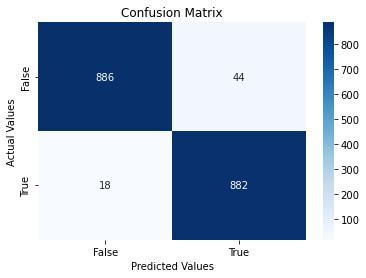

In [80]:
# creating a heatmap of the confusion matrix
ax = sns.heatmap(matrix, annot = True, cmap = "Blues", fmt = "d")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [81]:
# creating a list of all the feature names
feature_names = features.columns.values.tolist()

In [82]:
# exporting the tree to a text based visual
r = export_text(model, feature_names = feature_names)

In [83]:
print(r)

|--- towers <= 6.50
|   |--- inhibitors <= 0.50
|   |   |--- team kpm <= 1.25
|   |   |   |--- earned gpm <= 1239.54
|   |   |   |   |--- class: 0
|   |   |   |--- earned gpm >  1239.54
|   |   |   |   |--- earned gpm <= 1242.88
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- earned gpm >  1242.88
|   |   |   |   |   |--- class: 0
|   |   |--- team kpm >  1.25
|   |   |   |--- class: 1
|   |--- inhibitors >  0.50
|   |   |--- deaths <= 11.50
|   |   |   |--- team kpm <= 0.21
|   |   |   |   |--- class: 0
|   |   |   |--- team kpm >  0.21
|   |   |   |   |--- class: 1
|   |   |--- deaths >  11.50
|   |   |   |--- team kpm <= 0.51
|   |   |   |   |--- xpat10 <= 16434.00
|   |   |   |   |   |--- doublekills <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- doublekills >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- xpat10 >  16434.00
|   |   |   |   |   |--- damagemitigatedperminute <= 4938.09
|   |   |   |   |   |   |--- inhibitors <= 1.50
|

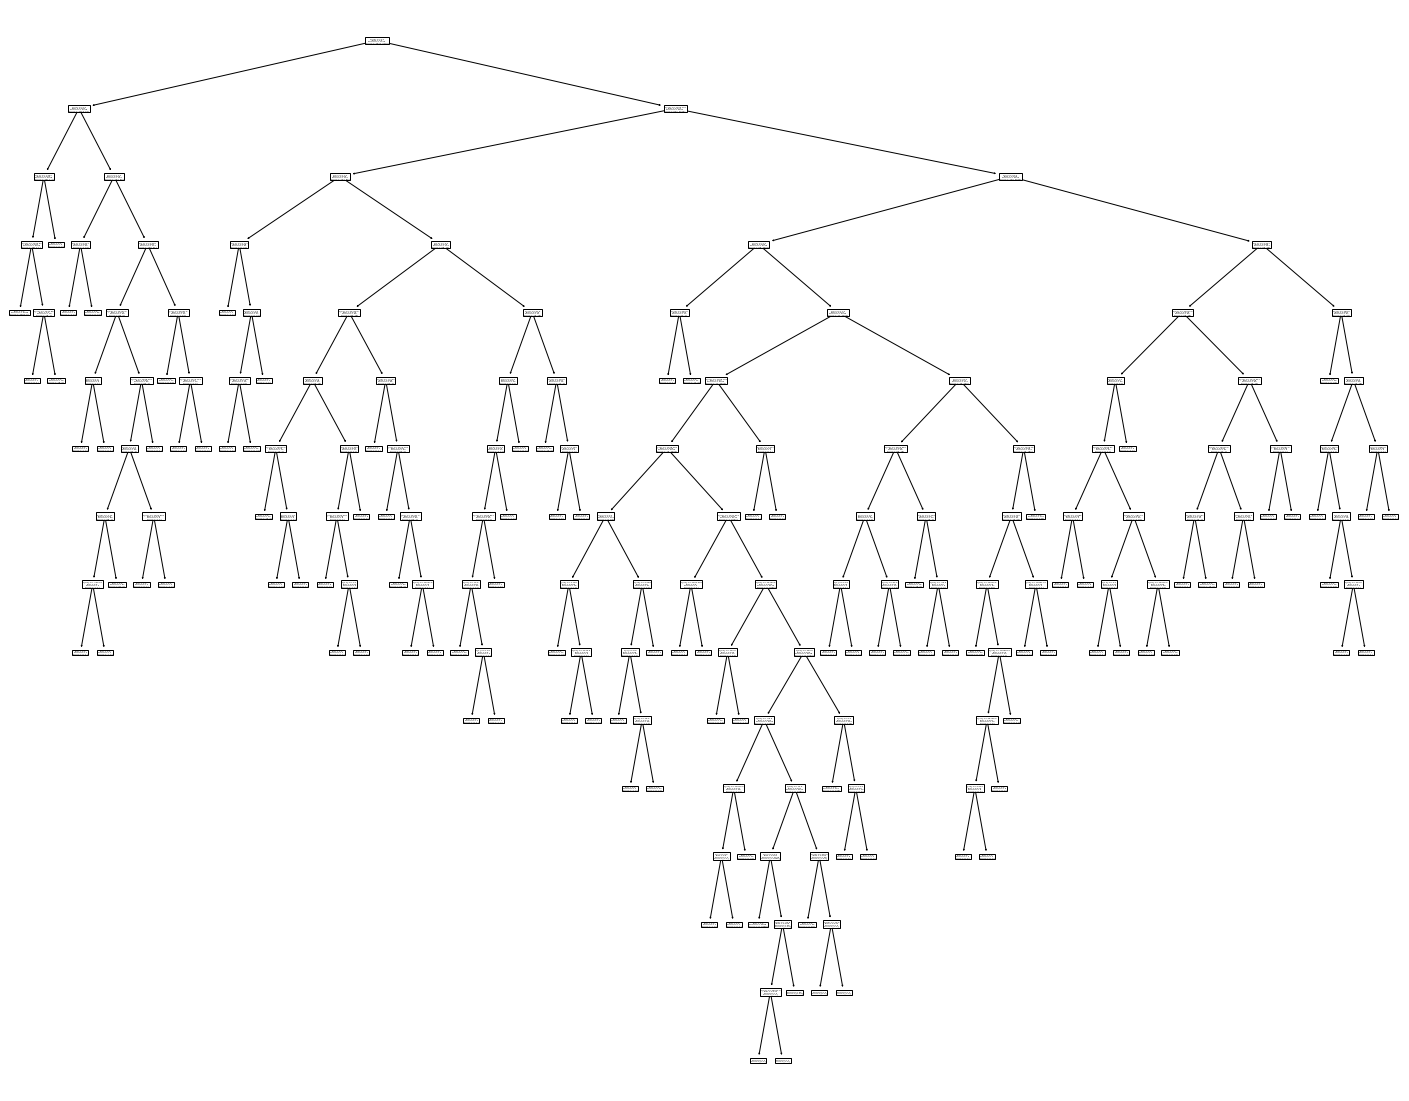

In [84]:
# displaying the decision tree classifier
fig = plt.figure(figsize = (25, 20))
ans = tree.plot_tree(model, filled = False)

In [85]:
# determining the feature importance
importances = model.feature_importances_
print(importances)

[8.50044636e-04 6.83071583e-04 2.32989182e-02 3.89848387e-03
 2.58977374e-03 9.64727377e-03 3.64304844e-04 2.73228633e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.67685338e-02
 0.00000000e+00 3.51333159e-03 3.64304844e-04 2.42869896e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.36571838e-04
 0.00000000e+00 0.00000000e+00 1.99739552e-04 0.00000000e+00
 8.92546868e-04 0.00000000e+00 5.11829770e-04 0.00000000e+00
 8.51061489e-01 0.00000000e+00 0.00000000e+00 6.12694510e-04
 1.57969589e-02 1.61572701e-03 1.71433304e-03 2.52241729e-03
 1.68042524e-03 5.07424604e-04 4.41954989e-04 0.00000000e+00
 3.64304844e-04 2.04610141e-03 2.23450304e-03 0.00000000e+00
 5.91995372e-04 8.50044636e-04 3.13741085e-02 2.40632266e-03
 4.57529065e-03 1.55101740e-03 0.00000000e+00 0.00000000e+00
 1.27940392e-04 2.07652098e-03 1.61087291e-05 1.85359889e-03
 0.00000000e+00 0.00000000e+00 1.22758069e-03 8.87226228e-06
 0.00000000e+00 4.60097946e-03 1.20219548e-03 5.07424604e-04
 3.64304844e-04 5.464572

In [86]:
indices = np.argsort(importances)[::-1]

In [87]:
names = [feature_names[i] for i in indices]

In [88]:
# printing out the features in order of importance
print(names)

['towers', 'earned gpm', 'deaths', 'team kpm', 'inhibitors', 'teamdeaths', 'goldat15', 'gspd', 'assists', 'dragons', 'teamkills', 'damagetakenperminute', 'goldspent', 'visionscore', 'xpat10', 'controlwardsbought', 'golddiffat10', 'dpm', 'damagemitigatedperminute', 'damagetochampions', 'minionkills', 'killsat10', 'xpat15', 'heralds', 'earnedgold', 'gamelength', 'kills', 'csdiffat15', 'turretplates', 'totalgold', 'xpdiffat15', 'barons', 'wardsplaced', 'csat15', 'wpm', 'chemtechs', 'elementaldrakes', 'wcpm', 'assistsat15', 'golddiffat15', 'doublekills', 'triplekills', 'infernals', 'elders', 'goldat10', 'csat10', 'assistsat10', 'pentakills', 'firstblood', 'quadrakills', 'mountains', 'firstdragon', 'killsat15', 'deathsat15', 'monsterkills', 'clouds', 'firsttothreetowers', 'vspm', 'cspm', 'wardskilled', 'side_Blue', 'xpdiffat10', 'csdiffat10', 'firstmidtower', 'oceans', 'deathsat10', 'firsttower', 'firstbaron', 'firstherald', 'dragons (type unknown)', 'hextechs', 'side_Red']


### Decision Tree Classifier with Hyperparameter Tuning

In [89]:
# creating the parameters for the hyperparameter tuning
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_split': [2, 5, 7, 10], 
          'min_samples_leaf': [1, 2, 5]}

In [90]:
# creating the classifier object
classifier = DecisionTreeClassifier(random_state = 42)

In [91]:
# creating a gridsearchcv
grid_search = GridSearchCV(classifier, params, scoring = 'roc_auc', n_jobs = -1)

In [92]:
# fitting the second model
model2 = grid_search.fit(feature_train, target_train)

In [93]:
# testing the second model
prediction2 = model2.predict(feature_test)

In [94]:
# checking out the accuracy score of the second model
accuracy_score(target_test, prediction2)

0.9688524590163935

In [95]:
print(f"Parameters for GridSearch: {grid_search.best_params_}")

Parameters for GridSearch: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [96]:
importance2 = model2.best_estimator_.feature_importances_

In [97]:
indices = np.argsort(importance2)[::-1]
names = [feature_names[i] for i in indices]

In [98]:
# displaying the features in order of importance
print(names)

['towers', 'teamdeaths', 'earned gpm', 'inhibitors', 'team kpm', 'goldat15', 'dragons', 'deaths', 'assists', 'controlwardsbought', 'goldspent', 'visionscore', 'xpdiffat10', 'wpm', 'xpat15', 'barons', 'firstbaron', 'heralds', 'firsttower', 'firstherald', 'firstmidtower', 'elders', 'dragons (type unknown)', 'hextechs', 'side_Red', 'chemtechs', 'oceans', 'clouds', 'firsttothreetowers', 'infernals', 'elementaldrakes', 'firstdragon', 'firstblood', 'pentakills', 'quadrakills', 'triplekills', 'doublekills', 'teamkills', 'kills', 'mountains', 'damagetakenperminute', 'turretplates', 'xpat10', 'deathsat15', 'assistsat15', 'killsat15', 'csdiffat15', 'xpdiffat15', 'golddiffat15', 'csat15', 'deathsat10', 'assistsat10', 'killsat10', 'csdiffat10', 'golddiffat10', 'csat10', 'goldat10', 'damagetochampions', 'cspm', 'monsterkills', 'minionkills', 'gspd', 'earnedgold', 'totalgold', 'vspm', 'wcpm', 'wardskilled', 'wardsplaced', 'damagemitigatedperminute', 'side_Blue', 'dpm', 'gamelength']


### Conclusion

The first decision tree classifier model I built had an accuracy score of 97%. This seems too good to be true. It may be an issue of overfitting, since decision tree models are prone to do that. However, when I conducted hyperparameter tuning to find the best hyperparameters for the model, it came back with 96% accuracy. 

In conclusion, based off the decision tree models I built, it seems that my hypothesis is not correct. Out of the top ten important features to predict a result, only one of features dealt with data during the first 15 minutes of the game. The one issue I do see with the model is that both towers and inhibitors are very important for the model. In order to win the game, you need to knock down almost all the towers and inhibitors. So this information is skewed. I think for the final milestone I will remove those two columns prior to building a model out. 

## Beyond Milestone 3

The first thing I want to do is remove towers and inhibitors from the features list based off the information from my conclusion.

In [99]:
# go back to the last dataframe before splitting into training sets
dummy_df.head()

,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,turretplates,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,side_Blue,side_Red
10,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,56560.0,1981.0858,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,44570.0,-0.028312,680.0,160.0,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,1,0
11,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,79912.0,2799.0193,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,45850.0,0.028312,792.0,184.0,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0,0,1
22,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,59579.0,1690.9839,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,53945.0,-0.207137,994.0,215.0,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,1,0
23,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,11.0,1.0,1.0,3.0,2.0,74855.0,2124.5506,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,66410.0,0.207137,1013.0,244.0,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0,0,1
46,1972,1,14,5,42,14,5,3.0,1.0,0.0,0.0,0.0,0.4260,1.0,4.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,2.0,67376.0,2049.9797,2327.8905,1776.2677,119.0,3.6207,51.0,1.5517,68.0,264.0,8.0325,62868,41372.0,1258.7830,57615.0,0.165672,874.0,269.0,34.7769,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,1191.0,2298.0,15.0,3.0,8.0,1.0,1,0


In [100]:
# remvoing towers and inhibitors from the dataframe
df1 = dummy_df.drop(columns = ["towers", "inhibitors"], axis = 1)
df1.head()

,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,firstmidtower,firsttothreetowers,turretplates,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,side_Blue,side_Red
10,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,5.0,56560.0,1981.0858,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,44570.0,-0.028312,680.0,160.0,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,1,0
11,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79912.0,2799.0193,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,45850.0,0.028312,792.0,184.0,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0,0,1
22,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,59579.0,1690.9839,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,53945.0,-0.207137,994.0,215.0,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,1,0
23,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,74855.0,2124.5506,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,66410.0,0.207137,1013.0,244.0,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0,0,1
46,1972,1,14,5,42,14,5,3.0,1.0,0.0,0.0,0.0,0.4260,1.0,4.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67376.0,2049.9797,2327.8905,1776.2677,119.0,3.6207,51.0,1.5517,68.0,264.0,8.0325,62868,41372.0,1258.7830,57615.0,0.165672,874.0,269.0,34.7769,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,1191.0,2298.0,15.0,3.0,8.0,1.0,1,0


### Splitting the set

In [101]:
# creating the features
features1 = df1.drop(columns = ['result'], axis = 1)
features1.head()

,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,firstmidtower,firsttothreetowers,turretplates,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,side_Blue,side_Red
10,1713,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,5.0,56560.0,1981.0858,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,44570.0,-0.028312,680.0,160.0,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,1,0
11,1713,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79912.0,2799.0193,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,45850.0,0.028312,792.0,184.0,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0,0,1
22,2114,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,59579.0,1690.9839,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,53945.0,-0.207137,994.0,215.0,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,1,0
23,2114,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,74855.0,2124.5506,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,66410.0,0.207137,1013.0,244.0,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0,0,1
46,1972,14,5,42,14,5,3.0,1.0,0.0,0.0,0.0,0.4260,1.0,4.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67376.0,2049.9797,2327.8905,1776.2677,119.0,3.6207,51.0,1.5517,68.0,264.0,8.0325,62868,41372.0,1258.7830,57615.0,0.165672,874.0,269.0,34.7769,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,1191.0,2298.0,15.0,3.0,8.0,1.0,1,0


In [102]:
# creating the target
target1 = df1['result']
target1.head()

10    0
11    1
22    0
23    1
46    1
Name: result, dtype: int64

In [104]:
# splitting the data into the standard 80/20 split
feature_train1, feature_test1, target_train1, target_test1 = train_test_split(features1, target1, test_size = 0.2)

### Decision Tree with hyperparameters 

In [105]:
# creating the parameters for the hyperparameter tuning
params1 = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_split': [2, 5, 7, 10], 
          'min_samples_leaf': [1, 2, 5]}

In [106]:
# creating the classifier object
classifier1 = DecisionTreeClassifier(random_state = 42)

In [107]:
# creating a gridsearchcv
grid_search1 = GridSearchCV(classifier1, params1, scoring = 'roc_auc', n_jobs = -1)

In [108]:
# fitting the second model
model3 = grid_search1.fit(feature_train1, target_train1)

In [109]:
# testing the second model
prediction3 = model3.predict(feature_test1)

In [110]:
# checking out the accuracy score of the second model
accuracy_score(target_test1, prediction3)

0.9573770491803278

In [111]:
print(f"Parameters for GridSearch: {grid_search1.best_params_}")

Parameters for GridSearch: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [112]:
importance3 = model3.best_estimator_.feature_importances_

In [117]:
# creating a list of all the feature names
feature_names1 = features1.columns.values.tolist()
feature_names1

['gamelength',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'team kpm',
 'firstdragon',
 'dragons',
 'elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'firstherald',
 'heralds',
 'firstbaron',
 'barons',
 'firsttower',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'damagetochampions',
 'dpm',
 'damagetakenperminute',
 'damagemitigatedperminute',
 'wardsplaced',
 'wpm',
 'wardskilled',
 'wcpm',
 'controlwardsbought',
 'visionscore',
 'vspm',
 'totalgold',
 'earnedgold',
 'earned gpm',
 'goldspent',
 'gspd',
 'minionkills',
 'monsterkills',
 'cspm',
 'goldat10',
 'xpat10',
 'csat10',
 'golddiffat10',
 'xpdiffat10',
 'csdiffat10',
 'killsat10',
 'assistsat10',
 'deathsat10',
 'goldat15',
 'xpat15',
 'csat15',
 'golddiffat15',
 'xpdiffat15',
 'csdiffat15',
 'killsat15',
 'assistsat15',
 'deathsat15'

In [118]:
indices1 = np.argsort(importance3)[::-1]
names1 = [feature_names1[i] for i in indices1]

In [120]:
# displaying the features in order of importance
print(names1)

['earned gpm', 'deaths', 'dragons', 'assists', 'teamdeaths', 'side_Red', 'firstbaron', 'dragons (type unknown)', 'elders', 'firstherald', 'heralds', 'firsttower', 'barons', 'chemtechs', 'firstmidtower', 'firsttothreetowers', 'turretplates', 'damagetochampions', 'hextechs', 'mountains', 'oceans', 'clouds', 'damagetakenperminute', 'infernals', 'elementaldrakes', 'firstdragon', 'team kpm', 'firstblood', 'pentakills', 'quadrakills', 'triplekills', 'doublekills', 'teamkills', 'kills', 'dpm', 'damagemitigatedperminute', 'side_Blue', 'xpat15', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'csat15', 'wardsplaced', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'golddiffat10', 'csat10', 'xpat10', 'goldat10', 'cspm', 'monsterkills', 'minionkills', 'gspd', 'goldspent', 'earnedgold', 'totalgold', 'vspm', 'visionscore', 'controlwardsbought', 'wcpm', 'wardskilled', 'wpm', 'gamelength']


The next step is to see what the model would look like if it only had the variables that fall before the 15 minute mark vs the variables that fall after the 15 minute mark

In [121]:
# go back to the last dataframe before splitting into training sets
dummy_df.head()

,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,turretplates,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,side_Blue,side_Red
10,1713,0,9,19,19,9,19,0.0,0.0,0.0,0.0,1.0,0.3152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,56560.0,1981.0858,3537.1979,2364.7285,74.0,2.5919,51.0,1.7863,33.0,197.0,6.9002,47070,28222.0,988.5114,44570.0,-0.028312,680.0,160.0,29.4221,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,107.0,-1617.0,-23.0,5.0,10.0,6.0,1,0
11,1713,1,19,9,62,19,9,6.0,0.0,0.0,0.0,0.0,0.6655,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,79912.0,2799.0193,3009.6673,2872.3292,93.0,3.2574,51.0,1.7863,45.0,205.0,7.1804,52617,33769.0,1182.8021,45850.0,0.028312,792.0,184.0,34.1856,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,-107.0,1617.0,23.0,6.0,18.0,5.0,0,1
22,2114,0,3,16,7,3,16,0.0,0.0,0.0,0.0,0.0,0.0851,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,59579.0,1690.9839,2984.0208,3109.6121,119.0,3.3775,55.0,1.5610,47.0,277.0,7.8619,57629,34688.0,984.5222,53945.0,-0.207137,994.0,215.0,34.3141,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,-1763.0,-906.0,-22.0,1.0,1.0,3.0,1,0
23,2114,1,16,3,39,16,3,1.0,0.0,0.0,0.0,1.0,0.4541,1.0,4.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,11.0,1.0,1.0,3.0,2.0,74855.0,2124.5506,2745.7237,2868.4201,129.0,3.6613,70.0,1.9868,65.0,346.0,9.8202,71004,48063.0,1364.1343,66410.0,0.207137,1013.0,244.0,35.6764,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,1763.0,906.0,22.0,3.0,3.0,1.0,0,1
46,1972,1,14,5,42,14,5,3.0,1.0,0.0,0.0,0.0,0.4260,1.0,4.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,2.0,67376.0,2049.9797,2327.8905,1776.2677,119.0,3.6207,51.0,1.5517,68.0,264.0,8.0325,62868,41372.0,1258.7830,57615.0,0.165672,874.0,269.0,34.7769,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,1191.0,2298.0,15.0,3.0,8.0,1.0,1,0


In [124]:
# dataframe with variables that occur within first 15 minutes of game
df2 = dummy_df[["firstdragon", 'firstherald', 'turretplates', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 
                'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15',
                'csat15', 'killsat15', 'assistsat15', 'deathsat15', 'result']]
df2.head()

,firstdragon,firstherald,turretplates,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,killsat15,assistsat15,deathsat15,result
10,0.0,1.0,5.0,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,5.0,10.0,6.0,0
11,1.0,0.0,0.0,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,6.0,18.0,5.0,1
22,0.0,1.0,2.0,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,1.0,1.0,3.0,0
23,1.0,0.0,3.0,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,3.0,3.0,1.0,1
46,1.0,0.0,1.0,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,3.0,8.0,1.0,1


### Splitting the set

In [125]:
# creating the features
features2 = df2.drop(columns = ['result'], axis = 1)
features2.head()

,firstdragon,firstherald,turretplates,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,killsat15,assistsat15,deathsat15
10,0.0,1.0,5.0,16218.0,18213.0,322.0,1523.0,137.0,-8.0,3.0,5.0,0.0,24806.0,28001.0,487.0,5.0,10.0,6.0
11,1.0,0.0,0.0,14695.0,18076.0,330.0,-1523.0,-137.0,8.0,0.0,0.0,3.0,24699.0,29618.0,510.0,6.0,18.0,5.0
22,0.0,1.0,2.0,14939.0,17462.0,317.0,-1619.0,-1586.0,-27.0,1.0,1.0,3.0,23522.0,28848.0,533.0,1.0,1.0,3.0
23,1.0,0.0,3.0,16558.0,19048.0,344.0,1619.0,1586.0,27.0,3.0,3.0,1.0,25285.0,29754.0,555.0,3.0,3.0,1.0
46,1.0,0.0,1.0,15466.0,19600.0,368.0,-103.0,813.0,13.0,0.0,0.0,1.0,24795.0,31342.0,560.0,3.0,8.0,1.0


In [126]:
# creating the target
target2 = df2['result']
target2.head()

10    0
11    1
22    0
23    1
46    1
Name: result, dtype: int64

In [127]:
# splitting the data into the standard 80/20 split
feature_train2, feature_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size = 0.2)

### Decision Tree with Hyperparameters

In [128]:
# creating the parameters for the hyperparameter tuning
params2 = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_split': [2, 5, 7, 10], 
          'min_samples_leaf': [1, 2, 5]}

In [129]:
# creating the classifier object
classifier2 = DecisionTreeClassifier(random_state = 42)

In [130]:
# creating a gridsearchcv
grid_search2 = GridSearchCV(classifier2, params2, scoring = 'roc_auc', n_jobs = -1)

In [131]:
# fitting the second model
model4 = grid_search2.fit(feature_train2, target_train2)

In [133]:
# testing the second model
prediction4 = model4.predict(feature_test2)

In [134]:
# checking out the accuracy score of the second model
accuracy_score(target_test2, prediction4)

0.725136612021858

In [135]:
print(f"Parameters for GridSearch: {grid_search2.best_params_}")

Parameters for GridSearch: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [136]:
importance4 = model4.best_estimator_.feature_importances_

In [137]:
# creating a list of all the feature names
feature_names2 = features2.columns.values.tolist()
feature_names2

['firstdragon',
 'firstherald',
 'turretplates',
 'goldat10',
 'xpat10',
 'csat10',
 'golddiffat10',
 'xpdiffat10',
 'csdiffat10',
 'killsat10',
 'assistsat10',
 'deathsat10',
 'goldat15',
 'xpat15',
 'csat15',
 'killsat15',
 'assistsat15',
 'deathsat15']

In [138]:
indices2 = np.argsort(importance4)[::-1]
names2 = [feature_names2[i] for i in indices2]

In [139]:
# displaying the features in order of importance
print(names2)

['goldat15', 'golddiffat10', 'deathsat15', 'firstdragon', 'xpat15', 'csdiffat10', 'xpdiffat10', 'killsat10', 'xpat10', 'csat10', 'csat15', 'deathsat10', 'assistsat10', 'assistsat15', 'killsat15', 'goldat10', 'turretplates', 'firstherald']
